In [99]:
import pandas as pd,numpy as np

df = pd.DataFrame({
    'x1': [1.2, 2.4, 3.1, 3.8, 4.5, 5.2, 6.0, 6.7, 7.5, 8.3],
    'y':  [0,   0,   0,   0,   0,   1,   1,   1,   1,   1]
})

# **How to manually compute ideal w and b:**

*   Look where is the threshold value that after it gave output for class 1 , x=4.5 is the threshold value.
*   So , above x=4.5 belongs to class 0 and if below it belongs to class 1
*   Decision boundary formula -(b/w) . Substitute 4.5 in b. we get -4.5w.
*   Next take minimal w. Let's assume w=1 and b=-4.5


# **Linear output**
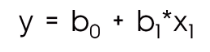

In [100]:
def linear_output(x1):
  w=1
  b=-4.5
  linear=b+(w*x1)
  return linear
linear_output(2.4)

-2.1

# **Sigmoid output**
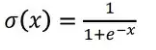

In [101]:
def sigmoid_function(y):
  sigmoid=1/(1+np.exp(-y))
  return sigmoid
sigmoid_function(-2.1)

np.float64(0.10909682119561293)

# **LogOdds (Logit) output**
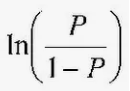

In [102]:
def log_odds_function(z):
  log_odds=np.log(z/(1-z))
  return log_odds
log_odds_function(0.10909682119561293)

np.float64(-2.1)


* **From linear output to probablility : use sigmoid function()**
* **From probability to linear : use log odds function()**
* **To remember : LogOdds is also called as Logit**
* **To remember : Initially we compute output using linear formula , next convert it to probability using sigmoid function , same logistic regression performs internally**


# **Binary Logistic Regression**

In [103]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [104]:
Scaler=StandardScaler()
X=Scaler.fit_transform(df.drop('y',axis=1))
y=df['y']

In [105]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [106]:
Lr=LogisticRegression(max_iter=100)
Lr.fit(X_train,y_train)
Lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [107]:
print('Training accuracy: ',accuracy_score(y_train,Lr.predict(X_train)))
print('Testing accuracy: ',accuracy_score(y_test,Lr.predict(X_test)))

Training accuracy:  1.0
Testing accuracy:  1.0


In [108]:
df['pred_prob']=Lr.predict_proba(X)[:,1]
df

,x1,y,pred_prob
0,1.2,0,0.104170
1,2.4,0,0.190452
2,3.1,0,0.261917
3,3.8,0,0.348649
4,4.5,0,0.446718
5,5.2,1,0.549118
6,6.0,1,0.660802
7,6.7,1,0.746100
8,7.5,1,0.824579
9,8.3,1,0.882617




> To Note : For class 0 , we want to decrease the prob to zero.For class 1 , we want to increase the prob to one
>



# **Plotting sigmoid curve**

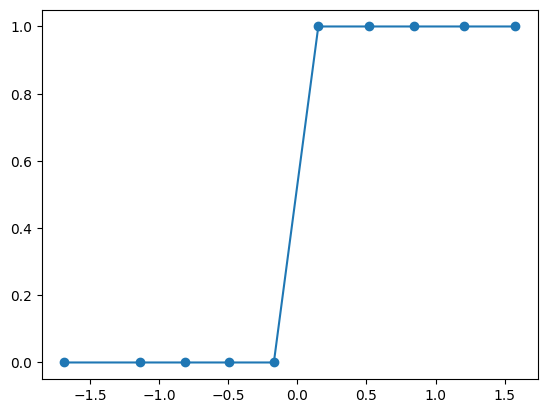

In [109]:
import matplotlib.pyplot as plt
plt.plot(X, y, 'o-') #o- to plot each point as circle and connect them with line
plt.show()

# **To know the cost function and its working for classification : https://github.com/sabarimurugans47/INTUITION-BEHIND-ALGORITHMS/blob/main/05.Classification%20cost%20function.ipynb**



---

